<a href="https://colab.research.google.com/github/RicardoJ4ir/Ciencia-de-Datos-Clase-2023/blob/main/Ciencia_de_datos_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

ds_salaries = pd.read_excel(r"C:\Users\Cuatro\Desktop\python\ds_salaries.xlsx")
ds_salaries.head();


El dataset usado se puede encontrar en https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

# Distribución de países

In [ ]:
total_de_países = len(ds_salaries['company_location'].value_counts())
total_de_países

72

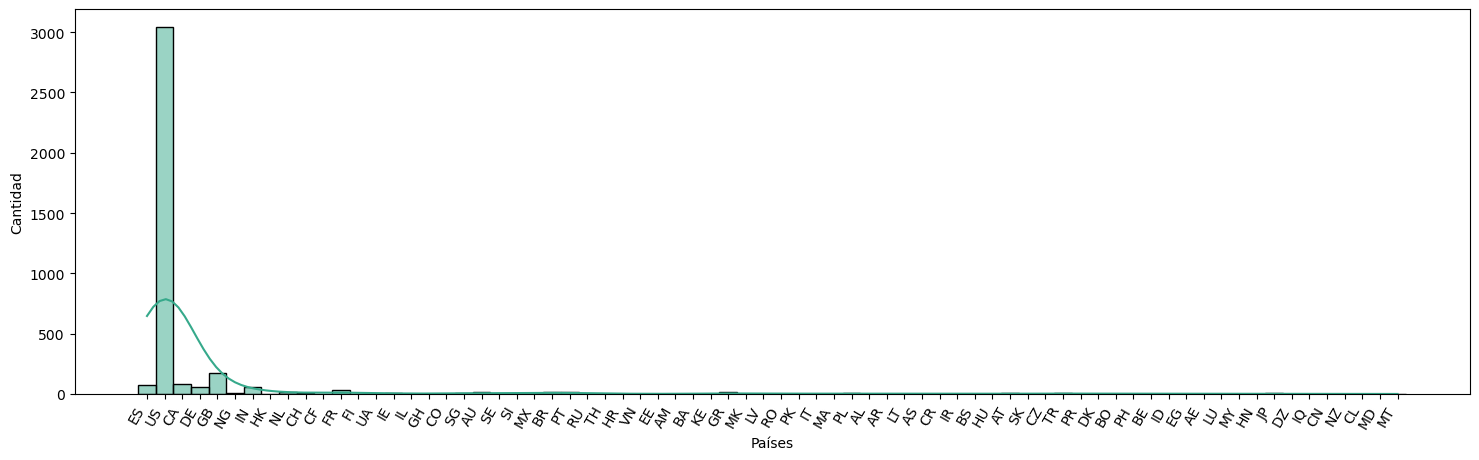

In [ ]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=60, ha='right')
ax = sns.histplot(data=ds_salaries, x='company_location', kde=True, bins=52, discrete=True, color='#36a98b')
_ = ax.set_xlabel('Países')
_ = ax.set_ylabel('Cantidad')

De la distribución anterior se observa que la **mayoria de los datos fueron obtenidos de Estados Unidos** por lo que **hay un** claro **sesgo** en la información, pues tenemos países para los que sólo aparece una fila. Entonces esta información será en su mayoría valida para EU y en una muy menor medida para Reino Unido (GB), Canada (CA), España (ES), India (IN) y Alemania (DE).

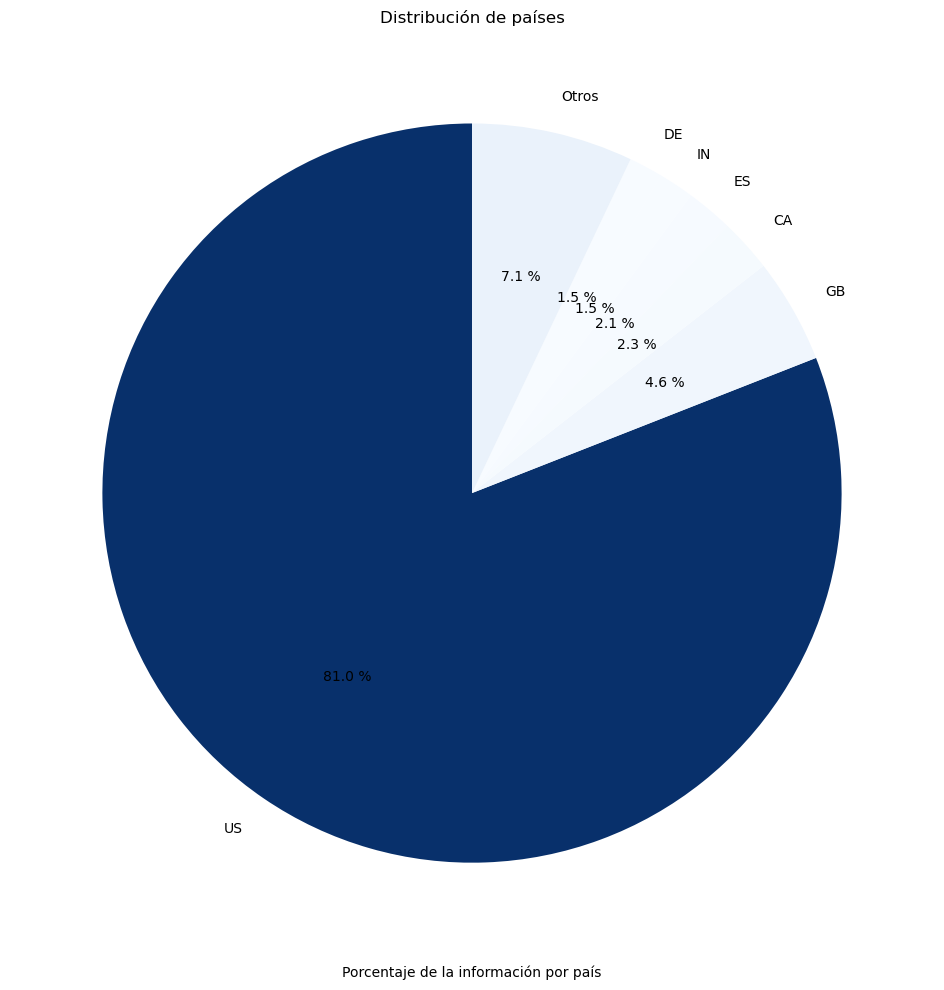

In [ ]:
paises = ['US','GB','CA','ES','IN','DE','Otros']
porcentaje = []
for i in range(6):
  porcentaje.append(ds_salaries['company_location'].value_counts()[i]/3755*100)
demas = 100 - sum(porcentaje)
porcentaje.append(demas)

fig, ax = plt.subplots(figsize = (12,12))

normdata = colors.Normalize(min(porcentaje), max(porcentaje))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(porcentaje))

plt.pie(porcentaje, labels = paises, autopct="%0.1f %%", colors = colores ,startangle=90)
_ = ax.set_title('Distribución de países')
_ = ax.set_xlabel('Porcentaje de la información por país')
plt.show() 

Con el grafíco anterior se puede comprobar que efectivamente hay un sesgo pues sólo **seis países abarcan el 93%** de los datos, de los cuales casi en su totalidad provienen de los **Estados Unidos, siendo poco más del 80%** de los datos. Para **Reino unido se tiene arriba del 4%** de los datos, para **España y Canada cerca del 2%**, para **India y Alemania un poco más del 1%** de los datos y **los demás países sólo representan el 7%** de los datos, siendo esto muy poco considerando que se tratan de **66 países restantes.**

# Salarios promedios por nivel de experiencia

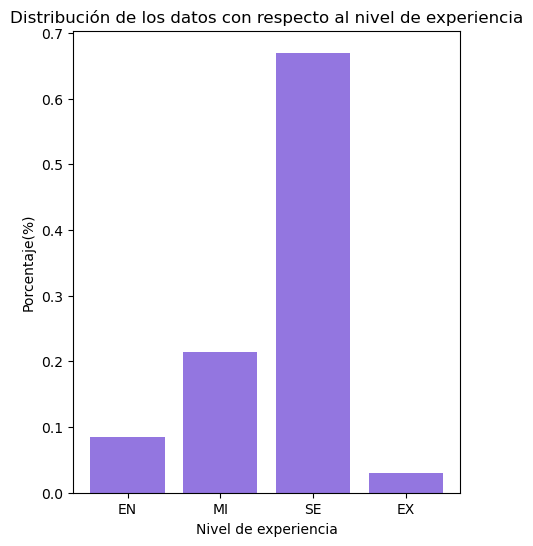

array([0.67003995, 0.21438083, 0.08521971, 0.03035952])

In [ ]:

(ds_salaries['experience_level'].value_counts(normalize=True).values)


porcentaje_experiencia = pd.DataFrame({'porcentaje_exp' : [ 0.08521971,0.21438083, 0.67003995, 0.03035952]},
                    index=('EN', 'MI', 'SE', 'EX')) #Hacemos el DF del nivel de experiencia y cuanto porcentaje de la muestra corresponde a ese grado de experiencia
plt.figure(figsize=(5,6)) #Se inicializa la figura
total = porcentaje_experiencia.sum(axis=1) 
#Se grafican los datos
plt.bar(total.index, total,color = '#9376E0')

#Etiquetamos a la figura y sus ejes
plt.title('Distribución de los datos con respecto al nivel de experiencia') # colocar un titulo a la grafica
plt.xlabel('Nivel de experiencia') # Poner un titulo o etiqueta a el Eje X
plt.ylabel('Porcentaje(%)') 
plt.show()

(ds_salaries['experience_level'].value_counts(normalize=True).values)


Con el gráfico se puede concluir que la mayoria de los datos fue obtenida de personas que tienen un grado **'Medio' a 'Senior'** en el ambito laboral, pues sólo cerca del **90%** de los datos corresponde a este perfil, del cual corresponde cerca del **70%** al grado 'Senior'. Mientras que para las personas que recien comienzan en este trabajo se tiene un **8.5%** de datos y para la gente con muchisima más experiencia se tiene sólo el **3%** de los datos.
Esto bien se puede deber a que no se recabó la suficiente información para tener más datos sobre estos dos grados de experiencia o no hay en abudancia gente con este perfil. Ya sea porque rápidamente pasan de 'Entry' a 'junior MID' y por otro lado, lleva mucho más tiempo pasar a un nivel de experiencia 'Expert'. Por lo que con estos datos podríamos concluir que no toma mucho pasar de 'Entry' a 'Mid', pero sí toma más tiempo llegar a 'Expert'.

In [ ]:
salarios_por_año = [] #Para guardar el salario promedio por año de acuerdo al nivel de experiencia
años = [2020,2021,2022,2023] #Hacemos una lista con los años
niveles_de_experiencia = ['EN','MI','SE','EX'] #Otra con los niveles de experiencia

for año in años:
  salarios_por_año.append(ds_salaries[ds_salaries.work_year == año]) #Aquí hacemos cuatro DataFrames nuevos para guardar los datos por año

salario_promedio_anual = [] #Una lisa en donde se guardará el año, el nivel de experiencia y el salario promedio (de ese año)

for i in range(4):
  salario_promedio_anual.append([2020+i,[[nivel, salarios_por_año[i][salarios_por_año[i].experience_level == nivel]['salary_in_usd'].mean()]
 for nivel in niveles_de_experiencia]])

#El primer indice nos da el año (variar)
#El segundo indice da la lista de experiencia y el salario prom (fijo [1])
#El tercer indice da el nivel y su salario (variar)
#El cuarto nos da o el nivel o el salario (fijo [1])


In [ ]:
#Salarios promedio (nivel mundial) dependiendo del nivel de experiencia para lo que va de la decada del 2020's
todos_los_años = []
for i in range(4):
  todos_los_años.append({'nivel_de_experiencia': niveles_de_experiencia,
                      "salario_promedio": [i[1] for i in salario_promedio_anual[i][1]]
                      }) #Esta lista guarda los diccionarios (por año) que contienen el nivel de experiencia y el salario promedio
tablas = []
for i in range(4):
  tablas.append(pd.DataFrame(todos_los_años[i])) #En esta nueva lista se guardan los diccionarios convertidos en DataFrames
#Se guardan como variables los datos para el salario promedio de acuerdo al nivel de experiencia por cada año
t1 = tablas[0].rename(columns = {tablas[0].columns[1]: 'salario_promedio(2020)'})
t2 = tablas[1].rename(columns = {tablas[1].columns[1]: 'salario_promedio(2021)'})
t3 = tablas[2].rename(columns = {tablas[2].columns[1]: 'salario_promedio(2022)'})
t4 = tablas[3].rename(columns = {tablas[3].columns[1]: 'salario_promedio(2023)'})

SPA = pd.concat([t1['salario_promedio(2020)'].round(0), t2['salario_promedio(2021)'].round(0), t3['salario_promedio(2022)'].round(0), t4['salario_promedio(2023)'].round(0)],axis = 1)
SPA = SPA.rename(index={0: 'EN', 1: 'MI', 2: 'SE', 3: 'EX'})#Juntamos todos los años en un solo DF y renombramos los índices
SPA #(Salarios Promedio Anual)

,salario_promedio(2020),salario_promedio(2021),salario_promedio(2022),salario_promedio(2023)
EN,57512.0,54905.0,77006.0,95284.0
MI,87565.0,82117.0,101306.0,116298.0
SE,137240.0,126085.0,147660.0,159569.0
EX,139944.0,186128.0,188260.0,203706.0


En la tabla se puede ver que en general el salario promedio (anual) de un cientifico de datos **ha ido incrementando año con año**, sin importar realmente el nivel de experiencia en el campo. 
Aunque del año 2020 al año 2021 se puede apreciar que para los niveles 'Entry','Mid' y 'Senior' hubo una pequeña caida en el salario, esto bien podría deberse a que entre esos años fue cuando aconteció la panedemia por el COVID-19, afectando la economía global de forma general. Aún así, estas caídas no fueron realmente significativas. Por otra parte, para el nivel 'Ex', ésta caída no se presentó, por el contrario, aumentó su salario. Bien esto pudo pasar ya que en su mayoría la gente con este nivel de experiencia se trata de ejecutivos, teniendo una mayor seguridad financiera.
Para el año 2023 todos los salarios volvieron a aumentar de forma significativa de manera general.

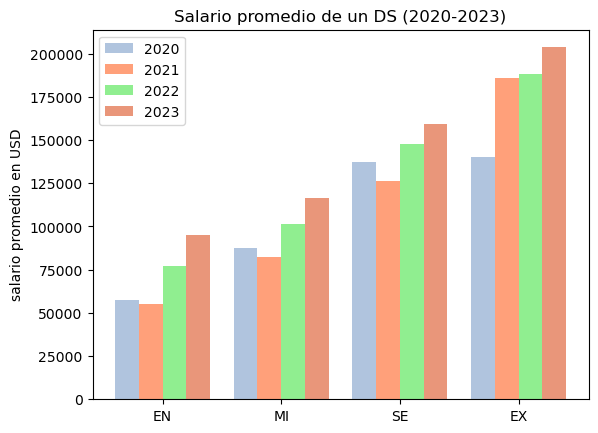

In [ ]:
# Salario promedio de un DS de acuerdo a su nivel de experiencia y de los años
coordenada = np.arange(4)
ancho = 0.2

fig, ax = plt.subplots()
#Graficamos las 4 tablas en la misma figura desplazando cada una para poderlas apreciar juntas
ax.bar(coordenada - 0.3, tablas[0]['salario_promedio'], ancho, label = '2020', color = '#B0C4DE')
ax.bar(coordenada -0.2/2,tablas[1]['salario_promedio'], ancho, label = '2021', color = '#FFA07A')
ax.bar(coordenada +0.2/2,tablas[2]['salario_promedio'], ancho, label = '2022', color = '#90EE90')
ax.bar(coordenada + 0.3, tablas[3]['salario_promedio'], ancho, label = '2023', color = '#E9967A')

ax.set_ylabel('salario promedio en USD')
ax.set_title('Salario promedio de un DS (2020-2023)')
ax.set_xticks(coordenada)
ax.set_xticklabels(niveles_de_experiencia)
plt.legend()
plt.show()

Con la figura se puede apreciar de forma más clara el crecimiento año con año del salario (anual) de un cientifico de datos (o afínes). También se puede apreciar que el crecimiento laboral de acuerdo al nivel de experiencia ha ido creciendo en los últimos años, pues en el año 2020 (azul) la diferencia de salario entre alguien de nivel 'Senior' y 'Expert/Ejecutive' no era muy significativa, sin encambio, en el año 2023 (rojo) esta diferencia es mucho más pronunciada. Esto último también se puede ver en los años 2021(naranja) y 2022(verde).

Por lo que con los datos obtenidos hasta el momento podemos decir que **es una profesión con un crecimiento ralativamente seguro a medida que se obtiene una mayor experiencia y através del tiempo**, esto podría variar de país en país debido al sesgo que se mencionó en la sección anterior.

# Analísis de los puestos de trabajo

In [ ]:
ds_salaries['job_title'].value_counts()
#Obtenemos los valores para los puestos de trabajo, vemos cuales son y cuantas veces se repiten

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

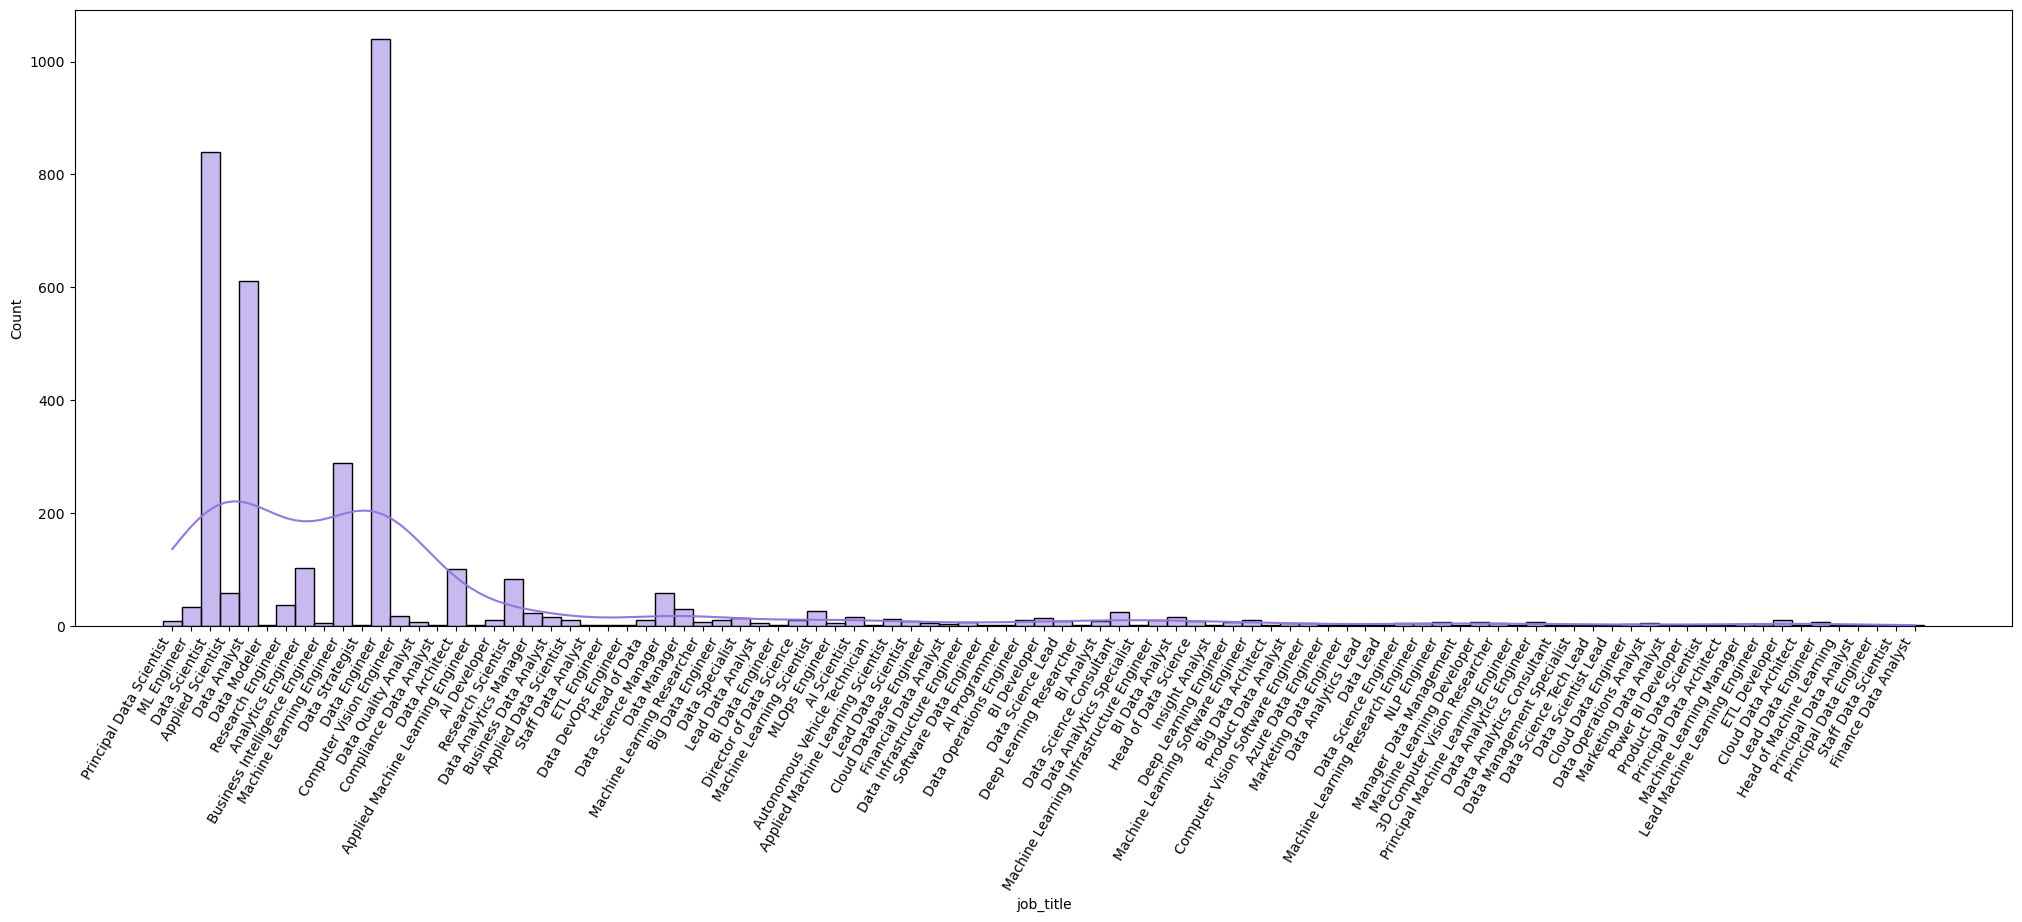

In [ ]:
plt.figure(figsize=(25,8))
sns.histplot(data=ds_salaries, x='job_title', kde=True, discrete=True, color='#9376E0')
plt.xticks(rotation=60, ha='right') #Usamos esto para rotar las etiquetas de cada columa, si no todo estaría amontonado
plt.show()
#Hacemos un grafico con la distribución de los puestos de trabajo

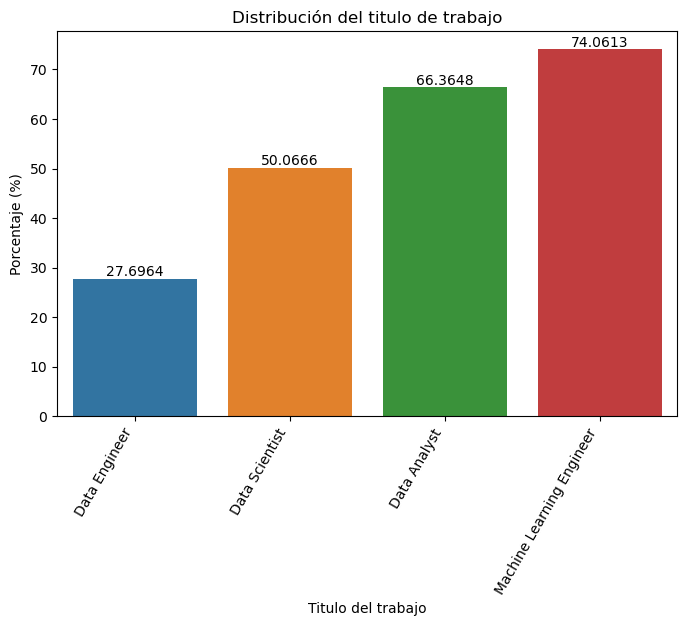

In [ ]:
puesto = ds_salaries['job_title'].value_counts().index

frecuencia = (ds_salaries['job_title'].value_counts(normalize=True).cumsum().values)*100

fig, ax = plt.subplots(figsize = (8,5))
_ = sns.barplot(x = puesto[0:4], y = frecuencia[0:4])
_ = ax.set_title('Distribución del titulo de trabajo')
_ = ax.set_xlabel('Titulo del trabajo')
_ = ax.set_ylabel('Porcentaje (%)')
plt.xticks(rotation=60, ha='right')
for i in ax.containers:
    ax.bar_label(i)

Si bien este es un data set sobre salarios de un cientifico de datos, obviamente no todos tendrán el mismo cargo en su empresa, pues aunque todos trabajen con datos, sus funciones cambiaran.
De la primera figura se observa que son **cuatro los puestos que más se repiten**, siendo estos **Data Engineer (27.6%), Applied Scientist (22.3%), Data Analyst (16%)** y **Machine Learning Engineer (8.7%)**. Con la segunda figura se puede observar que estos **representan un 74% de los puestos** relacionados a la ciencia de datos. 

Depués se tienen a 89 puestos representando el 26%, lo cual es bastante bajo considerando la cantidad de puestos. Y esto era de esperarse siendo que hay puestos que sólo aparecen una vez, tal es el caso de puestos como **Manager Data Management, Marketing Data Engineer** o **Finance Data Analyst**.
Pero que sean los puestos más frecuentes no implica necesariamente que sean los mejores pagados.


In [ ]:
#Más contratados
tablas_mas_contratados = [] #Inicializamos una lista vacía
for i in range(4):
    t = pd.DataFrame(salarios_por_año[i]['job_title'].value_counts(normalize=True)*100) #Se obtiene el DF del año correspondiente y de ahí se obtiene cuantas veces se repetio el puesto y se normaliza
    t = t.rename(columns={t.columns[0]: 'porcentaje'}).round({'porcentaje':2}) #Renombramos la primera columna y redondeamos el valor
    t = t.rename_axis('puesto_de_trabajo').reset_index() #Sacamos el indice como los puestos de trabajo y reiniciamos el índice
    tablas_mas_contratados.append(t[0:10]) #Obtenemos 4 data frames de los cuales sólo nos importan sus primeros 10 valores

tablas_mc_a = [] #En esta nueva tabla incertamos el año de analisis en la primera columa
for i in range(4):
    a = tablas_mas_contratados[i]
    a.insert(0, 'año', 2020+i) #(primera columna, nombre de la nueva columa, valor a rellenar)
    tablas_mc_a.append(a) 

tablas_mc_años = pd.concat([tablas_mc_a[i] for i in range(4)], axis =0 ) #Juntamos las 4 tablas de acuerdo al año

tablas_mc_años.insert(1,'' , puesto, True) #Incertamos una nueva columa en donde irá el puesto en el top
tablas_mc_años.set_index(['año','','puesto_de_trabajo', 'porcentaje'], inplace=True) #Renombramos los nombres de las columas, esto por la columa que dice el lugar del top
tablas_mc_años


Empty DataFrame
Columns: []
Index: [(2020, 1, Data Scientist, 27.63), (2020, 2, Data Engineer, 19.74), (2020, 3, Data Analyst, 10.53), (2020, 4, Machine Learning Engineer, 5.26), (2020, 5, Big Data Engineer, 3.95), (2020, 6, Business Data Analyst, 3.95), (2020, 7, Research Scientist, 2.63), (2020, 8, Lead Data Scientist, 2.63), (2020, 9, Lead Data Engineer, 2.63), (2020, 10, Product Data Analyst, 2.63), (2021, 1, Data Scientist, 19.13), (2021, 2, Data Engineer, 16.52), (2021, 3, Data Analyst, 9.13), (2021, 4, Machine Learning Engineer, 7.83), (2021, 5, Research Scientist, 4.35), (2021, 6, Data Science Manager, 2.61), (2021, 7, Data Science Consultant, 2.17), (2021, 8, Director of Data Science, 2.17), (2021, 9, BI Data Analyst, 2.17), (2021, 10, Big Data Engineer, 2.17), (2022, 1, Data Engineer, 29.33), (2022, 2, Data Scientist, 24.34), (2022, 3, Data Analyst, 16.59), (2022, 4, Machine Learning Engineer, 6.55), (2022, 5, Analytics Engineer, 3.43), (2022, 6, Data Architect, 2.76), (2022, 7, Data Science Manager, 1.74), (2022, 8, Applied Scientist, 1.08), (2022, 9, Research Scientist, 0.9), (2022, 10, ML Engineer, 0.9), (2023, 1, Data Engineer, 27.96), (2023, 2, Data Scientist, 20.73), (2023, 3, Data Analyst, 17.2), (2023, 4, Machine Learning Engineer, 8.85), (2023, 5, Research Scientist, 3.08), (2023, 6, Data Architect, 2.91), (2023, 7, Analytics Engineer, 2.58), (2023, 8, Applied Scientist, 2.24), (2023, 9, Research Engineer, 1.79), (2023, 10, Data Manager, 1.23)]

Esto de los puestos más contratados se puede desglosar aún más, la tabla representa el top 10 de puestos de trabajo relacionados a ciencia de datos más contratados desde el año 2020 hasta el año 2023. Aquí se puede observar que efectivamente, los cuatro puestos anteriormente aparecen en el top 4 a lo largo de los años, en particular el top 2 es entre el Data Scientis y el Data Engineer, mienstras que Data Analyst y Machine Learning Engineer mantienen sus respectivos puestos (3ro y 4t0)

**Esta información se puede contrastar con los datos de los puestos mejor pagados:**

De la tabla se puede ver que ninguno de estos puestos aparece en la tabla de los puestos más contratados, y por el contrario ninguno de estos puestos está en la otra tabla

In [ ]:
puesto = ds_salaries['job_title'].value_counts().index #Obtenemos los puestos

salario_por_puesto = [] #Inicializamos una lista vacía
for i in puesto:
    s = ds_salaries[ds_salaries.job_title == i]['salary_in_usd'].mean() #Agregamos el salario prom para cada puesto
    s = round(s,0) #Redondeamos
    salario_por_puesto.append(s)
salario_puesto = pd.DataFrame({'puesto': puesto,
                                'salario_por_puesto': salario_por_puesto}) #Y lo juntamos en un DataFrame
salario_puesto;

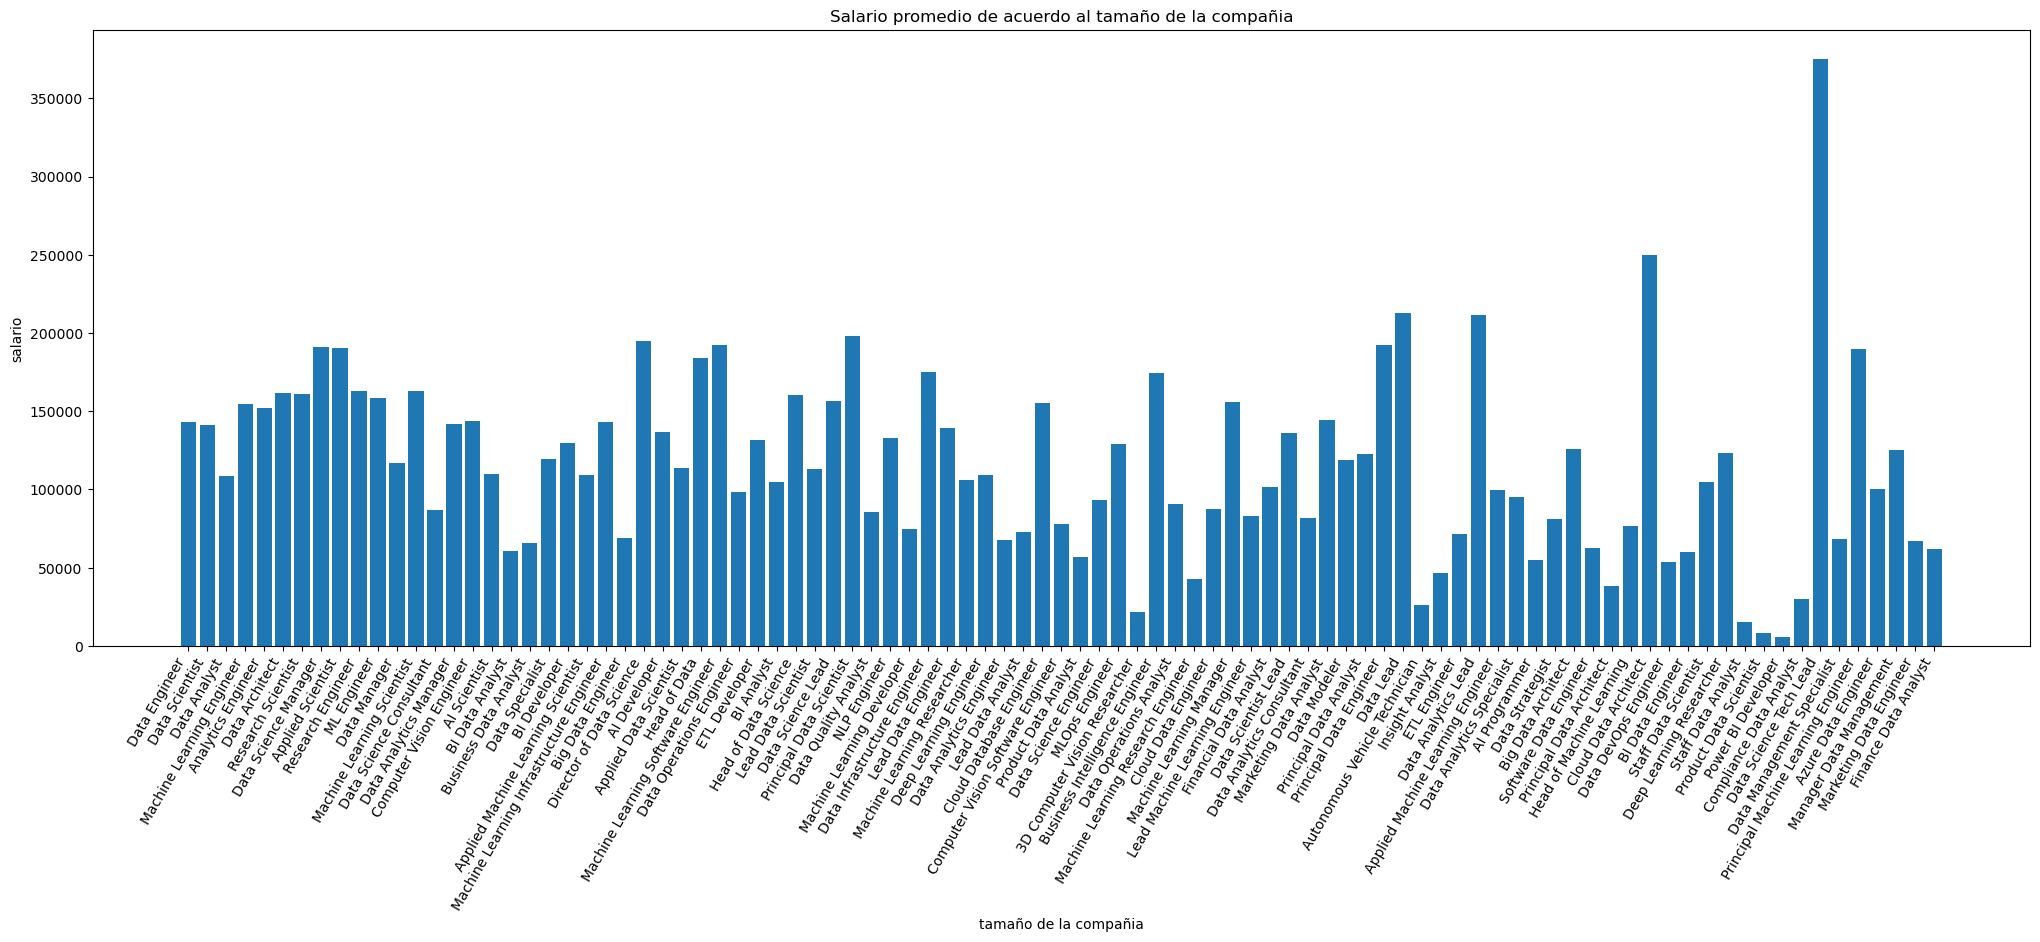

In [ ]:
plt.figure(figsize=(25,8))
#Graficamos el puesto y su respectivo salario
plt.bar(salario_puesto['puesto'],salario_puesto['salario_por_puesto'])
plt.title('Salario promedio de acuerdo al tamaño de la compañia')     
ax = plt.subplot()                   
ax.set_xlabel('tamaño de la compañia')  
ax.set_ylabel('salario') 
plt.xticks(rotation=60, ha='right')
plt.show()


Vemos que la distribución del salario no se parece en nada a la distribución de los puestos más contratados, de hecho, el **salario más alto corresponde a Data Science Tech Lead**, que si lo buscamos en el otro gráfico, aparecerá como uno de los menos frecuentes, lo mismo pasa con los puestos de **Cloud Data Architect** y **Data Lead**

In [ ]:
#Puestos mejors pagados
#El proceso para escribir este codigo fue analogo al anterior, sólo cambio el salario en vez de la frecuencia
tablas_mejores_pagados = []
for i in range(4):
  L = []
  for titulo in list(dict(salarios_por_año[i]['job_title'].value_counts())):
    salario_promedio = salarios_por_año[i][salarios_por_año[i].job_title == titulo]['salary_in_usd'].mean()
    L.append([2020+i,titulo, round(salario_promedio,0)])

  L.sort(key=lambda x: x[2], reverse = True)
  tablas_mejores_pagados.append(pd.DataFrame(L[0:10]).rename({0: 'año', 1:'puesto_de_trabajo',2:'salario_promedio'}, axis = 'columns'))

tablas_mp_años = pd.concat([tablas_mejores_pagados[i] for i in range(4)], axis =0 )

puesto = [i for i in range(1,11)]
for _ in range(2):
  puesto += puesto

tablas_mp_años.insert(1,'' , puesto, True)
tablas_mp_años.set_index(['año','','puesto_de_trabajo', 'salario_promedio'], inplace=True)

tablas_mp_años


Empty DataFrame
Columns: []
Index: [(2020, 1, Director of Data Science, 325000.0), (2020, 2, Machine Learning Scientist, 260000.0), (2020, 3, Research Scientist, 246000.0), (2020, 4, Data Science Manager, 190200.0), (2020, 5, Lead Data Scientist, 152500.0), (2020, 6, Principal Data Scientist, 148261.0), (2020, 7, Machine Learning Engineer, 145904.0), (2020, 8, Machine Learning Manager, 117104.0), (2020, 9, Business Data Analyst, 110000.0), (2020, 10, BI Data Analyst, 98000.0), (2021, 1, Cloud Data Architect, 250000.0), (2021, 2, Principal Data Scientist, 239152.0), (2021, 3, Applied Machine Learning Scientist, 230700.0), (2021, 4, Machine Learning Infrastructure Engineer, 195000.0), (2021, 5, Principal Data Engineer, 192500.0), (2021, 6, Head of Data, 189280.0), (2021, 7, Lead Data Engineer, 179720.0), (2021, 8, Principal Data Analyst, 170000.0), (2021, 9, Director of Data Science, 168708.0), (2021, 10, ML Engineer, 166769.0), (2022, 1, Data Analytics Lead, 405000.0), (2022, 2, Data Science Tech Lead, 375000.0), (2022, 3, Research Engineer, 207870.0), (2022, 4, Machine Learning Software Engineer, 202033.0), (2022, 5, Marketing Data Analyst, 200000.0), (2022, 6, Head of Data Science, 195938.0), (2022, 7, AI Developer, 193768.0), (2022, 8, Data Science Manager, 191407.0), (2022, 9, Principal Machine Learning Engineer, 190000.0), (2022, 10, Applied Scientist, 188311.0), (2023, 1, Director of Data Science, 242729.0), (2023, 2, AI Scientist, 231232.0), (2023, 3, Head of Data, 224739.0), (2023, 4, Computer Vision Engineer, 224240.0), (2023, 5, Data Lead, 212500.0), (2023, 6, NLP Engineer, 205000.0), (2023, 7, Data Science Manager, 204291.0), (2023, 8, Machine Learning Scientist, 194469.0), (2023, 9, Applied Scientist, 191144.0), (2023, 10, Machine Learning Software Engineer, 178000.0)]

Y en estas tablas se muestra que en efecto, esos puestos antes mencionados aparecen como unos de los mejores pagados, pero son de los menos frecuentes. 
Entonces se puede concluir que no porque sea un puesto muy demandado, necesariamente implicará que sea el mejor pagado, más bien entre más especifico sea un puesto, mayor será el salario adquirido.
Esto en particular puede que aplique a los países que se mencionaron al incio, debido al sesgo de países que hay, pues podría pasar que los puestos que son poco frecuentes, también se deba a que ubique en un lugar remoto o que el salario no sea tan algo debido a la economía del país
